In [11]:
import numpy as np

"""
define your neural network. These parameters have to be initially declared.
N: input batch size, 
D_in: Input dimensions(here we have a total of 1000 input data)
D_out: Output labels  
H : number of hidden units. we have 10 here
"""
N, D_in, H, D_out = 64, 1000, 100, 10

#Create random input and output data

x = np.random.randn(N, D_in)
y = np.random.randn(N, D_out)

#initialize random weights
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)

#Define Learning rate to update weights
learning_rate = 1e-6

#We compute the gradients on complete bath rather than individual inputs
#run the loop for predefined epochs

for run in range(500):
    
    #Step:1 Forward pass
    h = x.dot(w1)
    #pass thru non linear activation function. Using RELU
    h_relu = np.maximum(h, 0)
    
    # compute the dot products to output layer. No activation here
    y_pred = h_relu.dot(w2)
    
    #Step2: Compute loss
    loss = np.square(y - y_pred).sum()
    print(run, loss)
    
    #step3: Gradient Descent: Back prop to compute gradients of w1 and w2
    grad_y_pred = 2 * (y_pred - y)
    grad_w2 = h_relu.T.dot(grad_y_pred)
    grad_h_relu = grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.copy()
    grad_h[h < 0] = 0
    grad_w1 = x.T.dot(grad_h)
    
    #update weights
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2
    
    
    

0 25165598.0102


# 2 layer neural using Tensors

In [8]:
import torch

dtype = torch.FloatTensor

"""
N is the batch size
D_in is the input dimension
D_out is the Output dimension. Number of expected labels
h is number of hidden units.
"""
N, D_in, D_out, H = 64, 1000, 10, 100

#create input and out put matrix

x = torch.randn(N, D_in).type(dtype)
y = torch.randn(N, D_out).type(dtype)

#initialise the weight vector

w1 = torch.randn(D_in, H).type(dtype)
w2 = torch.randn(H, D_out).type(dtype)

learning_rate = 1e-6

for t in range(1):
    h = x.mm(w1)
    h_relu = h.clamp(min = 0)
    y_pred = h_relu.mm(w2)
    
    loss = (y_pred - y).pow(2).sum()
    
    print(t, loss)
    
    #back prop
    
    grad_y_pred = 2 * (y_pred - y)
    grad_w2 = h_relu.t().mm(grad_ypred)
    grad_h_relu = grad_y_pred.mm(w2.t())
    grad_h = grad_h_relu.clone()
    grad_h[h < 0] = 0
    grad_w1 = x.t().mm(grad_h)

    # Update weights using gradient descent
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2


0 37735796.56236088


# Neural Network with pytorch variables - using autograd

In [81]:
from torch.autograd import Variable
import matplotlib.pyplot as plt

loss_arr = []

dtype = torch.FloatTensor

N, D_in, D_out, H = 64, 1000, 10, 100

x = Variable(torch.randn(N, D_in).type(dtype), requires_grad = False)
y = Variable(torch.randn(N, D_out).type(dtype), requires_grad = False)

w1 = Variable(torch.randn(D_in, H).type(dtype), requires_grad = True)
w2 = Variable(torch.randn(H, D_out).type(dtype), requires_grad = True)

learning_rate = 1e-6
for i in range(500):
    h = x.mm(w1)
    h_relu = h.clamp(min = 0)
    y_pred = h_relu.mm(w2)
    
    loss = (y_pred - y).pow(2).sum()
    
    #print(i, loss.data[0])
    loss_arr.append(loss.data[0])
    loss.backward()
    
    
    w1.data = w1.data - learning_rate * w1.grad.data
    w2.data = w2.data - learning_rate * w2.grad.data
    
    w1.grad.data.zero_()
    w2.grad.data.zero_()

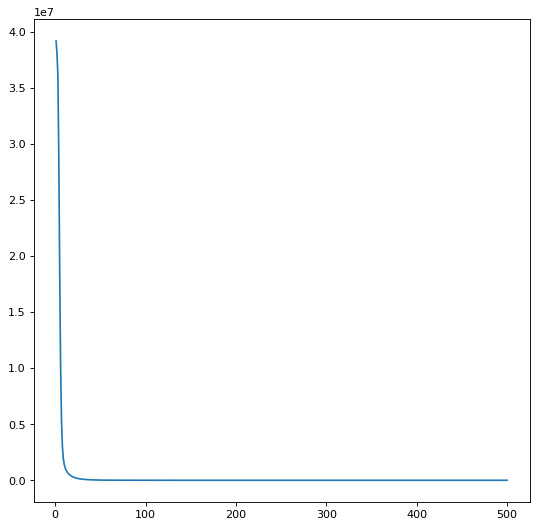

In [82]:
x = np.linspace(1, 500, 500)

y = loss_arr

plt.figure(figsize=(8,8), dpi = 80)
plt.plot(x, y)

plt.show()


# Neural Network Implementation using Pytorch nn package

In [91]:
import torch
from torch.autograd import Variable
import numpy as np

%matplotlib inline

loss_arr = []

dtype = torch.FloatTensor

N, D_in, D_out, H = 64, 1000, 10, 100

x = Variable(torch.randn(N, D_in).type(dtype), requires_grad = False)
y = Variable(torch.randn(N, D_out), requires_grad = False)

model = torch.nn.Sequential(torch.nn.Linear(D_in, H, bias = True),
                            torch.nn.ReLU(),
                            torch.nn.Linear(H, D_out, bias=True)
        )

loss_fn = torch.nn.MSELoss(size_average=False)

learning_rate = 1e-4

for t in range(500):
    y_pred = model(x)
    
    loss = loss_fn(y_pred, y)
    #print(t, loss.data[0])
    loss_arr.append(loss.data[0])
    model.zero_grad()
    
    loss.backward()
    
    for param in model.parameters():
        #print(type(param.data), param.size())
        param.data -= learning_rate * param.grad.data
    
    #for b in model.bias:
     
        #print(b)

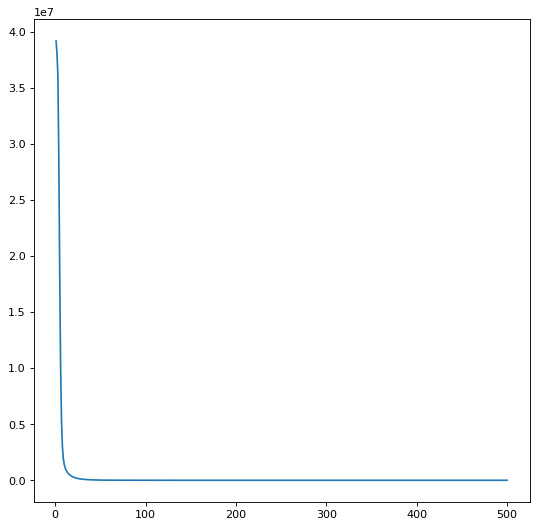

In [90]:
x = np.linspace(1, 500, 500)

y = loss_arr

fig = plt.figure(figsize=(8,8), dpi = 80)
plt.plot(x, y)
plt.show()


# Using Optimizer to update parameters

In [79]:
import torch
from torch.autograd import Variable
import numpy as np

%matplotlib inline

loss_arr = []

dtype = torch.FloatTensor

N, D_in, D_out, H = 64, 1000, 10, 100

x = Variable(torch.randn(N, D_in).type(dtype), requires_grad = False)
y = Variable(torch.randn(N, D_out), requires_grad = False)

model = torch.nn.Sequential(torch.nn.Linear(D_in, H, bias = True),
                            torch.nn.ReLU(),
                            torch.nn.Linear(H, D_out, bias=True)
        )

loss_fn = torch.nn.MSELoss(size_average=False)

learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
for t in range(500):
    y_pred = model(x)
    
    loss = loss_fn(y_pred, y)
    #print(t, loss.data[0])
    loss_arr.append(loss.data[0])
    model.zero_grad()
    
    loss.backward()
    
    optimizer.step()

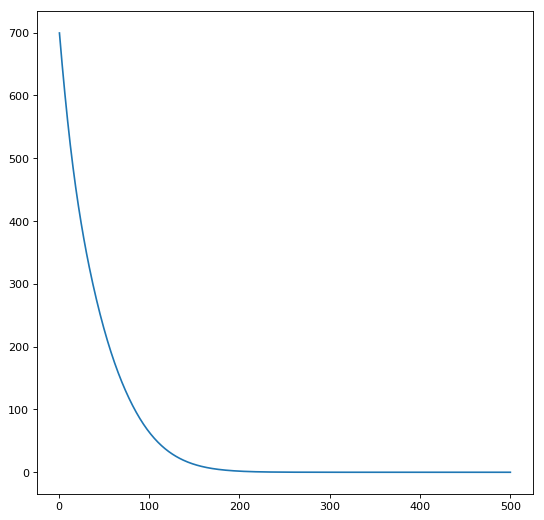

In [80]:
x = np.linspace(1, 500, 500)

y = loss_arr

plt.figure(figsize=(8,8), dpi = 80)
plt.plot(x, y)
plt.show()


# Construction of your own modules.

1. Sometimes you need to construct your own model, but adding custom steps rather than using the existing ones in Modules. for this you need to subclass the existing nn.Module and define *forward* which takes input Variable and produces Output.

